<img src="https://unal.edu.co/_assets/ca8e1ca9a551c3e3ffc233b30e54ba93/images/escudoUnal.svg" width="800" height="500">

# LABORATORIO 1

## Gustavo Arteaga 
## Universidad Nacional de Colombia - Facultad de minas 
## Tópicos Azanzados de Procesamiento Digital de Señales
### 2024-03-14


# 2. Conversión D/A: Reconstrucción de señales a partir de sus muestras

#### Actividades:
##### 2.1 📝 Recrea el proceso de reconstrucción de una señal cuadrada con una frecuencia de 60 Hz, la cual ha sido muestreada con una velocidad (FS) de 1080 Hz. Debes usar la función generadora propuesta en la Ecuación (2), y seleccionar además un criterio para escoger un rango representativo de tiempos para dicha función generadora.

<img src="../img/ecuaciones.png">



## ✅ Resultado:

## Función generadora

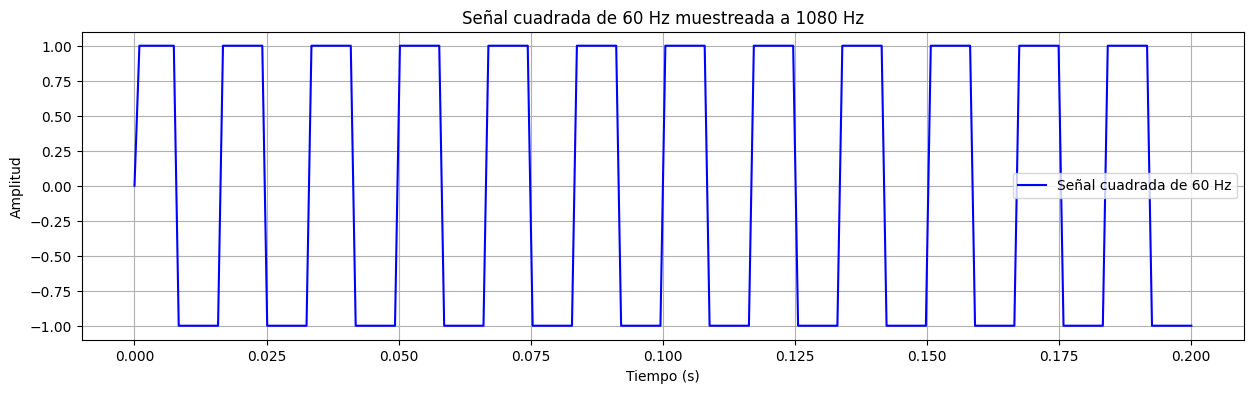

In [45]:
f = 60  # Frecuencia de la señal actualizada a 60 Hz
t = np.linspace(0, 0.2, int(0.2 * 1080))  # Rango de tiempo actualizado a 200 ms con muestreo a 1080 Hz
señal_cuadrada_actualizada = np.sign(np.sin(2 * np.pi * f * t))

# Visualización de la señal cuadrada actualizada
plt.figure(figsize=(15, 4))
plt.plot(t, señal_cuadrada_actualizada, label='Señal cuadrada de 60 Hz', color='b')
plt.title('Señal cuadrada de 60 Hz muestreada a 1080 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.show()


## Elección del Rango de Tiempo

#### Dado que un ciclo de una señal de 60 Hz dura aproximadamente 1/60 segundos o 16.67 ms, mostrar al menos 10 ciclos proporcionaría una buena visión de la forma de onda. Esto se traduce en un rango de tiempo de aproximadamente 200 ms.

## Número de Muestras

#### Con una frecuencia de muestreo de 1080 Hz, se generan 1080 puntos de datos por segundo. Para un rango de tiempo de 200 ms, esto se traduce en 216 puntos de datos. Esta cantidad es más que suficiente para una representación detallada de la señal.

# ***************************************************************************************

##### 2.2 📝 Compara los resultados obtenidos con una reconstrucción basada en pulsos cuadrados como función generadora (es decir, el método de Muestreo y Retención). ¿Qué se puede decir con respecto a la calidad de la reconstrucción en cada caso? ¿Por qué los conversores D/A comerciales se basan en la reconstrucción por pulsos?

## ✅ Resultado:

## Método de Muestreo y Retención

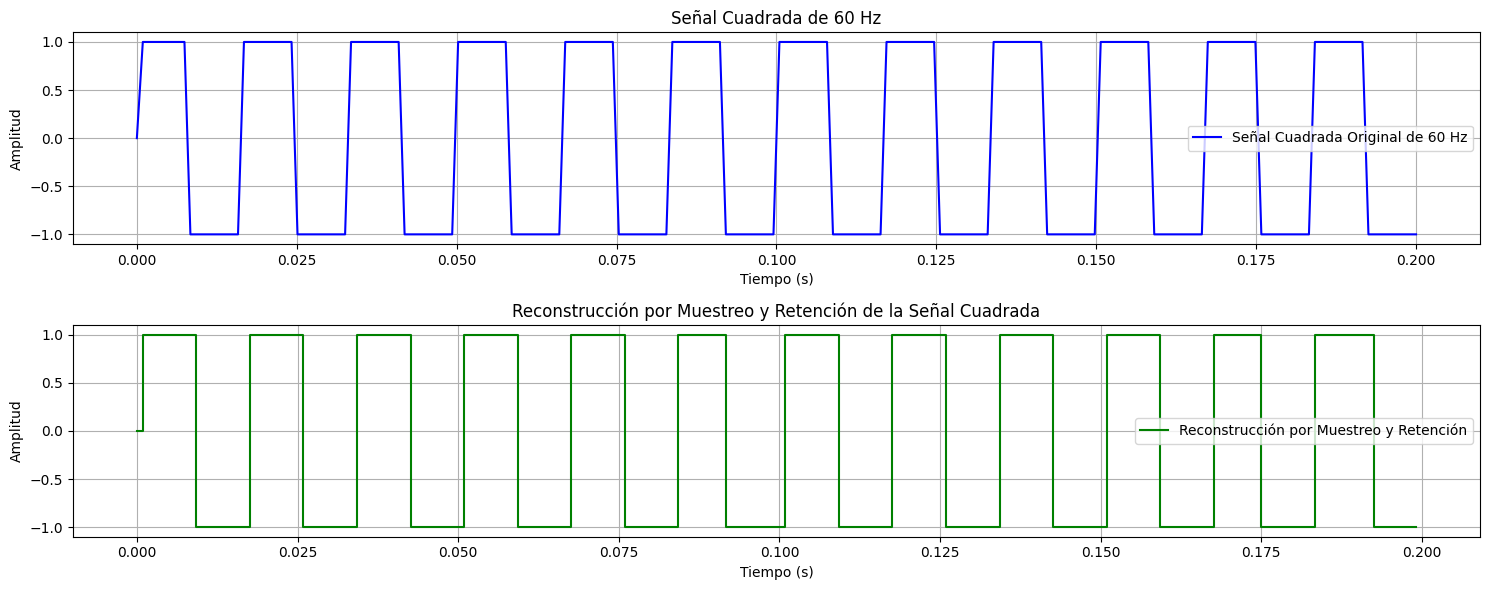

In [52]:
# Generación de la señal cuadrada basada en los parámetros dados
f_cuadrada = 60  # Frecuencia de la señal cuadrada en Hz
t_cuadrada = np.linspace(0, 0.2, int(0.2 * 1080))  # Rango de tiempo para 200 ms con muestreo a 1080 Hz
senal_cuadrada = np.sign(np.sin(2 * np.pi * f_cuadrada * t_cuadrada))

# Muestreo de la señal cuadrada
t_muestreo_cuadrada = np.arange(0, 0.2, 1/1080)  # Puntos de muestreo para la señal cuadrada
senal_muestreada_cuadrada = np.sign(np.sin(2 * np.pi * f_cuadrada * t_muestreo_cuadrada))

# Reconstrucción por Muestreo y Retención para la señal cuadrada
t_myr_cuadrada = np.repeat(t_muestreo_cuadrada, 2)[1:-1]  # Duplicamos cada punto de muestreo excepto el primero y el último
senal_myr_cuadrada = np.repeat(senal_muestreada_cuadrada, 2)[:-2]  # Duplicamos cada valor muestreado y quitamos los dos últimos

# Visualización
plt.figure(figsize=(15, 6))

# Señal cuadrada original
plt.subplot(2, 1, 1)
plt.plot(t_cuadrada, senal_cuadrada, label='Señal Cuadrada Original de 60 Hz', color='b')
plt.title('Señal Cuadrada de 60 Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Reconstrucción por Muestreo y Retención
plt.subplot(2, 1, 2)
plt.step(t_myr_cuadrada, senal_myr_cuadrada, where='post', label='Reconstrucción por Muestreo y Retención', color='g')
plt.title('Reconstrucción por Muestreo y Retención de la Señal Cuadrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### El método de Muestreo y Retención captura el valor de una señal en instantes de tiempo discretos y mantiene este valor hasta el próximo instante de muestreo. Esto resulta en una señal escalonada que aproxima la señal original. La calidad de la reconstrucción depende de la frecuencia de muestreo (cuanto mayor sea, mejor será la aproximación, ya que se capturan más detalles de la señal original) y de la frecuencia de la señal (señales con frecuencias más bajas son más fáciles de reconstruir con alta fidelidad, ya que requieren menos puntos de muestreo para capturar adecuadamente su forma de onda). La reconstrucción por muestreo y retención puede ser bastante fiel a la señal original si la frecuencia de muestreo es suficientemente alta (significativamente mayor que el doble de la frecuencia máxima de la señal, según el teorema de Nyquist).  Sin embargo, para la red bajoe estudio puede presentar distorsiones debido al efecto escalonado, especialmente si la frecuencia de muestreo no es lo suficientemente alta.

## ¿Por Qué los Conversores D/A Comerciales se Basan en la Reconstrucción por Pulsos?

#### Los conversores Digital a Analógico (D/A) comerciales usan el método de reconstrucción por pulsos debido a su capacidad para equilibrar la simplicidad, el costo, la eficiencia y la calidad de la señal reconstruida. Esto permite permite una implementación directa en hardware ya que la reconstrucción por pulsos se complementa con la facilidad de filtrado para suavizar los pulsos y acercar la señal resultante a la forma de onda original, mejorando la calidad de la señal analógica final. 